## Assignment 2

- Create two models for the relationship between height and weight based on gender
- Modify the code in Assignment 1 to ask for a person's gender as well as their height to produce an estimate of a person's weight using the models you created
- Find the weights and use those in your function (i.e. don't generate a model each time)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import statsmodels.formula.api as smf

df = pd.read_csv('heights_weights_genders.csv')

In [5]:
df.head(3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


In [12]:
female_df = df[df['Gender'] == 'Female']
male_df = df[df['Gender'] == 'Male']

### For Female:

In [17]:
female_df.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


In [25]:
lm = smf.ols(formula="Weight~Height",data=female_df).fit()
lm.params

Intercept   -246.013266
Height         5.994047
dtype: float64

In [26]:
female_intercept, female_slope = lm.params

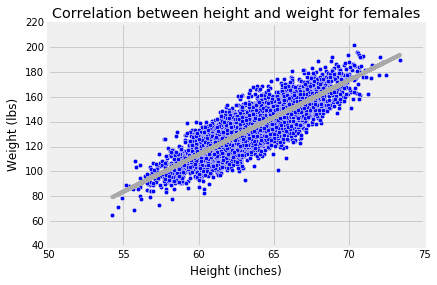

In [36]:
female_df.plot(kind="scatter",x="Height",y="Weight")
plt.plot(female_df["Height"],female_slope*female_df["Height"]+female_intercept,"-",color="darkgrey") 

plt.title('Correlation between height and weight for females')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')

### For Male:

In [19]:
male_df.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


In [20]:
lm = smf.ols(formula="Weight~Height",data=male_df).fit()
lm.params

Intercept   -224.498841
Height         5.961774
dtype: float64

In [23]:
male_intercept, male_slope = lm.params

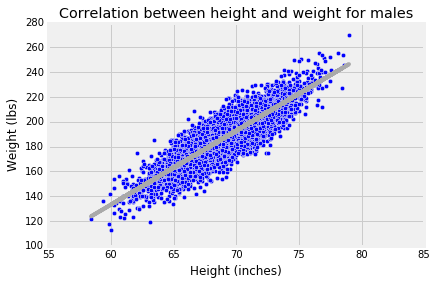

In [35]:
male_df.plot(kind="scatter",x="Height",y="Weight")
plt.plot(male_df["Height"],male_slope*male_df["Height"]+male_intercept,"-",color="darkgrey") 

plt.title('Correlation between height and weight for males')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')

### Function:

In [89]:
gender = input('Male or female? ')

if gender == 'female' or gender == 'Female':
    height = int(input('Height (in inches): '))
    weight = female_slope * height + female_intercept
    print('If a person is female and ' + str(height) + ' inches tall, they probably weigh ' + str(round(weight,2)) + ' pounds.')

elif gender == 'male' or gender == 'Male':
    height = int(input('Height (in inches): '))
    weight = male_slope * height + male_intercept 
    print('If a person is male and ' + str(height) + ' inches tall, they probably weigh ' + str(round(weight,2)) + ' pounds.')
        
else:
    print("Input error.")

Male or female? Male
Height (in inches): 57
If a person is male and 57 inches tall, they probably weigh 115.32 pounds.


In [90]:
gender = input('Male or female? ')

if gender == 'female' or gender == 'Female':
    height = int(input('Height (in inches): '))
    weight = 5.994047 * height - 246.013266
    print('If a person is female and ' + str(height) + ' inches tall, they probably weigh ' + str(round(weight,2)) + ' pounds.')

elif gender == 'male' or gender == 'Male':
    height = int(input('Height (in inches): '))
    weight = 5.961774 * height - 224.498841
    print('If a person is male and ' + str(height) + ' inches tall, they probably weigh ' + str(round(weight,2)) + ' pounds.')
        
else:
    print("Input error.")

Male or female? Male
Height (in inches): 57
If a person is male and 57 inches tall, they probably weigh 115.32 pounds.
